<!-- <center> -->
<h1> Using MOMENT for Classification </h1>
<!-- </center> -->
<hr>

## Contents
### 1. Loading of MOMENT
### 2. Classification Head


In [ ]:
!git clone https://github.com/its-Pallabi/moment

Cloning into 'moment'...
remote: Enumerating objects: 781, done.
remote: Counting objects: 100% (306/306), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 781 (delta 286), reused 240 (delta 240), pack-reused 475
Receiving objects: 100% (781/781), 25.03 MiB | 9.66 MiB/s, done.
Resolving deltas: 100% (501/501), done.


In [ ]:
!pip install numpy pandas scikit-learn matplotlib tqdm
!pip install git+https://github.com/its-Pallabi/moment.git

  Cloning https://github.com/its-Pallabi/moment.git to /tmp/pip-req-build-xv9ofsr8
  Running command git clone --filter=blob:none --quiet https://github.com/its-Pallabi/moment.git /tmp/pip-req-build-xv9ofsr8
  Resolved https://github.com/its-Pallabi/moment.git to commit 7a6231208318fc6b855ac083a144192c15ec24aa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-no

In [ ]:
from momentfm import MOMENTPipeline

model = MOMENTPipeline.from_pretrained(
    "AutonLab/MOMENT-1-large",
    model_kwargs={
        'task_name': 'classification',
        'n_channels': 1,
        'num_class': 2
    }, # We are loading the model in `classification` mode
)


/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


config.json:   0%|          | 0.00/248 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

In [ ]:
model.init()
print(model)

MOMENTPipeline(
  (normalizer): RevIN()
  (tokenizer): Patching()
  (patch_embedding): PatchEmbedding(
    (value_embedding): Linear(in_features=8, out_features=1024, bias=False)
    (position_embedding): PositionalEmbedding()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
  

## 3. Inputs and Outputs

MOMENT takes 3 inputs:
1. An input time series of length $T=512$ timesteps and $C$ channels, and
2. Two optional masks, both of length $T=512$.
    - The input mask is utilized to regulate the time steps or patches that the model should attend to. For instance, in the case of shorter time series, you may opt not to attend to padding.
    - The second mask, referred to simply as mask, denotes masked or unobserved values. We employ mask tokens to replace all patches containing any masked time step. MOMENT can attend to these mask tokens during reconstruction.
    - By default, all time steps are observed and attended to.

MOMENT returns a `TimeseriesOutputs` object. Since this is a classification task, it returns both `logits` and `embeddings` of the input.

In [ ]:
from pprint import pprint
import torch
# takes in tensor of shape [batchsize, n_channels, context_length]
x = torch.randn(16, 1, 512)
output = model(x)
pprint(output)

TimeseriesOutputs(forecast=None,
                  anomaly_scores=None,
                  logits=tensor([[-0.0637,  0.0673],
        [-0.0826,  0.0918],
        [-0.0646,  0.0734],
        [-0.1127,  0.0207],
        [-0.0890,  0.0207],
        [-0.0864,  0.0849],
        [-0.0768,  0.1088],
        [-0.0632,  0.0609],
        [-0.1002,  0.0827],
        [-0.0774,  0.1054],
        [-0.1402,  0.0370],
        [-0.0689,  0.0504],
        [-0.0726,  0.0514],
        [-0.0812,  0.0679],
        [-0.0688,  0.0779],
        [-0.0961,  0.1182]], grad_fn=<AddmmBackward0>),
                  labels=None,
                  input_mask=None,
                  pretrain_mask=None,
                  reconstruction=None,
                  embeddings=tensor([[[-9.5816e-02,  5.6538e-02, -6.0000e-02,  ..., -4.7617e-02,
           2.4319e-02,  7.4160e-03],
         [-4.1717e-02,  9.1202e-02, -1.1762e-01,  ...,  2.8625e-03,
           1.5429e-02, -3.7270e-03],
         [-8.7715e-02,  3.8952e-02,  5.1280e-

In [ ]:
# backward
# [batch_size, num_classes]
logits = output.logits

# [batch_size, ]
predicted_labels = logits.argmax(dim=1)
predicted_labels

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**Note**: The classification head is randomly initialized, so these predictions are random. We must train the classification head to get reasonable results. Below we show a quick example of how we can fine-tune the classification head.

### 4.1 Classification Dataset

For these experiments, we will use the EEG dataset


In [ ]:
from torch.utils.data import DataLoader
from momentfm.data.classification_dataset import ClassificationDataset

train_dataset = ClassificationDataset(data_split='train')
test_dataset = ClassificationDataset(data_split='test')

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Shape of self.data: (8987, 14)
Shape of self.data: (5992, 14)
Train dataset size: 8987
Test dataset size: 5992


Now let's visualize the time series

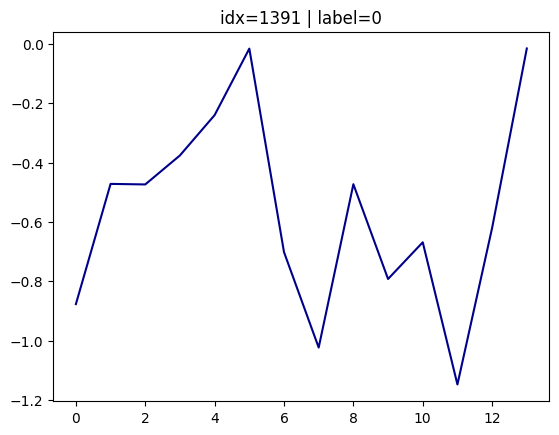

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

idx = np.random.randint(0, len(train_dataset))
heartbeat_start = np.argmax(train_dataset[idx][1])
heartbeat = train_dataset[idx][0].squeeze()[heartbeat_start:]
label = train_dataset[idx][2]
plt.plot(heartbeat, c='darkblue')
plt.title(f"idx={idx} | label={label}")
plt.show()

### 4.2 Unsupervised Representation Learning using MOMENT


Embed the train and test datasets!
First, we will write a simple function `get_embedding` which will iterate over the training and testing datasets, and embed each time series. Then we will use the `fit_svm` function to fit a support vector machine (SVM) model using these embeddings as features and training labels.

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=False, drop_last=False)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, drop_last=False)
print(len(train_dataloader))
print(len(test_dataloader))

141
94


In [ ]:
from tqdm import tqdm
import torch
import numpy as np

def get_embedding(model, dataloader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    embeddings, labels = [], []
    with torch.no_grad():
        for batch_x, batch_masks, batch_labels in tqdm(dataloader, total=len(dataloader)):
            batch_x = batch_x.to(device).float()
            batch_masks = batch_masks.to(device)

            output = model(batch_x, input_mask=batch_masks) # Assuming output is a custom object with 'embeddings' attribute
            embedding = output.embeddings
            embeddings.append(embedding.detach().cpu().numpy())  # Move to CPU and detach
            labels.append(batch_labels.numpy())  # Convert to numpy array

    embeddings = np.concatenate(embeddings)
    labels = np.concatenate(labels)

    return embeddings, labels


For unsupervised representation learning, MOMENT can be initialized in both `embedding` and `classification` mode.

```python

model = MOMENTPipeline.from_pretrained(
    "AutonLab/MOMENT-1-large",
    model_kwargs={'task_name': 'embedding'}, # We are loading the model in `embedding` mode
)
model.init()

```

In [ ]:
model = MOMENTPipeline.from_pretrained(
    "AutonLab/MOMENT-1-large",
    model_kwargs={'task_name': 'embedding'}, # We are loading the model in `embedding` mode
)
model.init()

In [ ]:
model.float()
train_embeddings, train_labels = get_embedding(model, train_dataloader)
test_embeddings, test_labels = get_embedding(model, test_dataloader)

print(train_embeddings.shape, train_labels.shape)
print(test_embeddings.shape, test_labels.shape)


100%|██████████| 94/94 [1:16:52<00:00, 49.07s/it]

(8987, 1024) (8987,)
(5992, 1024) (5992,)


### 4.3 Learning a Statistical ML Classifier on MOMENT Embeddings

In [ ]:
train_embeddings.shape

torch.Size([8987, 1024])

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create SVM classifier
clf = SVC(kernel='linear')

# Flatten embeddings if needed
train_embeddings_flat = train_embeddings.reshape(train_embeddings.shape[0], -1)
test_embeddings_flat = test_embeddings.reshape(test_embeddings.shape[0], -1)

# Fit SVM on training data
clf.fit(train_embeddings_flat, train_labels)

# Predict on training and test data
train_preds = clf.predict(train_embeddings_flat)
test_preds = clf.predict(test_embeddings_flat)

# Calculate accuracies
train_accuracy = accuracy_score(train_labels, train_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.7645
Test Accuracy: 0.5706


### 4.4 Visualize the Embeddings

Next, let's visualize the embeddings that MOMENT is learning using Principal Component Analysis (PCA)

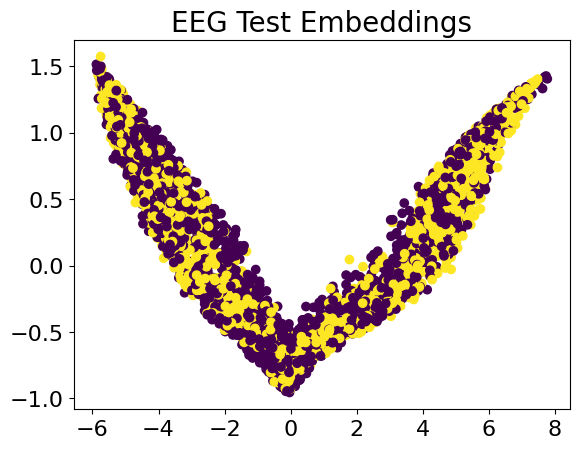

In [ ]:
from sklearn.decomposition import PCA

test_embeddings_manifold = PCA(n_components=2).fit_transform(test_embeddings)

plt.title(f"EEG Test Embeddings", fontsize=20)
plt.scatter(
    test_embeddings_manifold[:, 0],
    test_embeddings_manifold[:, 1],
    c=test_labels.squeeze()
)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()